# __<center>DATA ANALYSIS  WITH AIRBNB NYC 2019 DATASET</center>__
<hr/>
<br/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = r"C:\Users\USER\Desktop\Portfolio\Datasets\AB_NYC_2019.csv"
df = pd.read_csv(file_path)


In [3]:
# Check for missing data and basic dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Data Cleaning

In [4]:
# Cleaning missing values
df_cleaned = df.dropna(subset=['price', 'room_type', 'neighbourhood_group'])
df_cleaned['reviews_per_month'].fillna(0, inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_11560\3477846999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['reviews_per_month'].fillna(0, inplace=True)


#### Exploratory Data Analysis

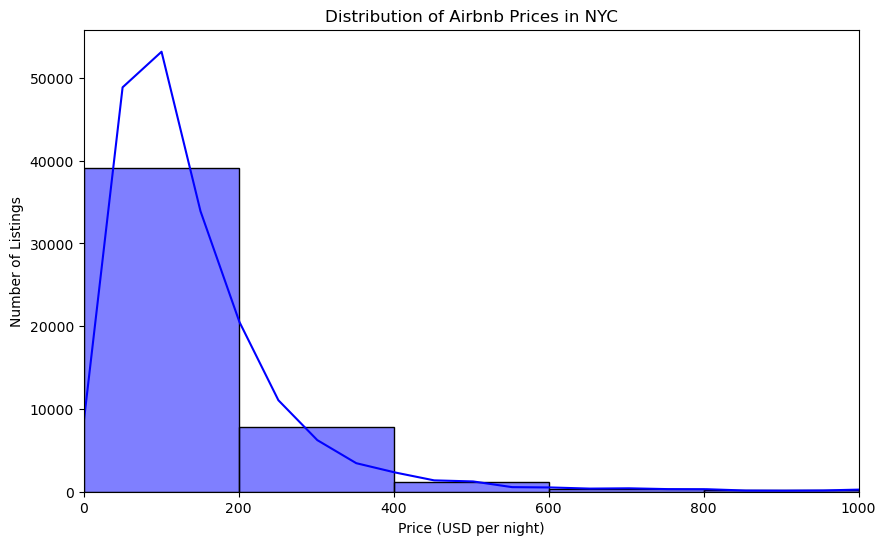

In [5]:
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['price'], bins=50, kde=True, color='blue')
plt.xlim(0, 1000)  # Limiting to focus on relevant prices
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price (USD per night)')
plt.ylabel('Number of Listings')
plt.show()



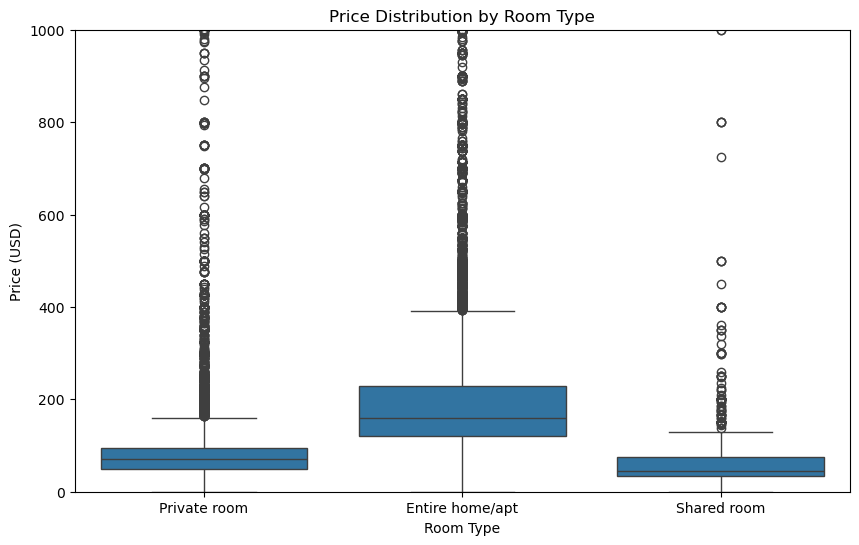

In [6]:
# Price by Room Type
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.ylim(0, 1000)  # Limit y-axis for clarity
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.show()



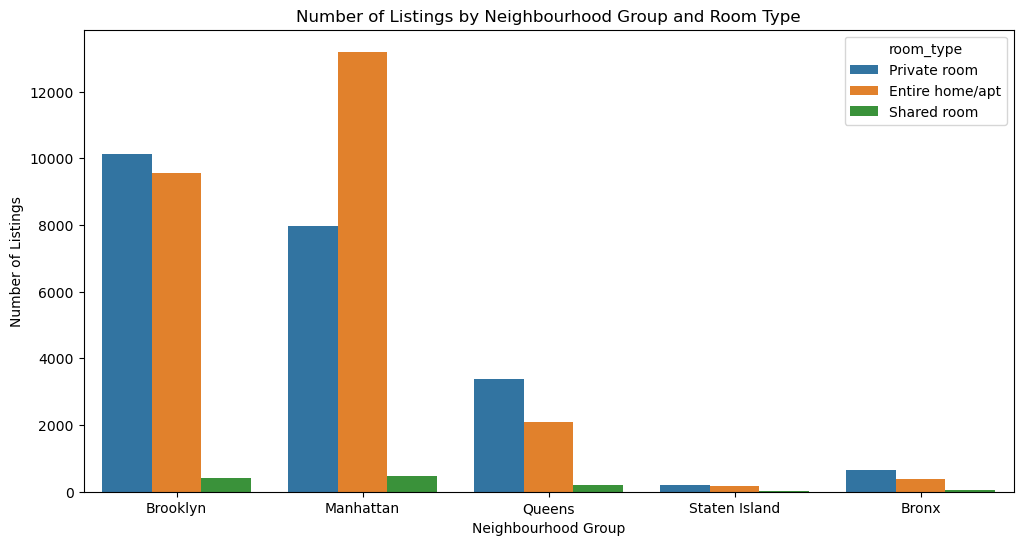

In [7]:
# Listings by Neighbourhood Group and Room Type
plt.figure(figsize=(12,6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df_cleaned)
plt.title('Number of Listings by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()



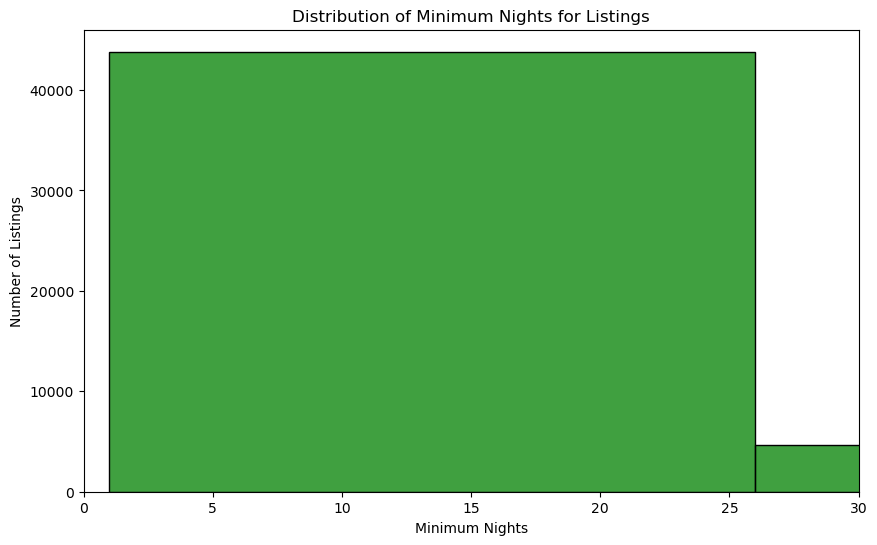

In [8]:
# Minimum nights distribution
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['minimum_nights'], bins=50, kde=False, color='green')
plt.xlim(0, 30)
plt.title('Distribution of Minimum Nights for Listings')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Listings')
plt.show()



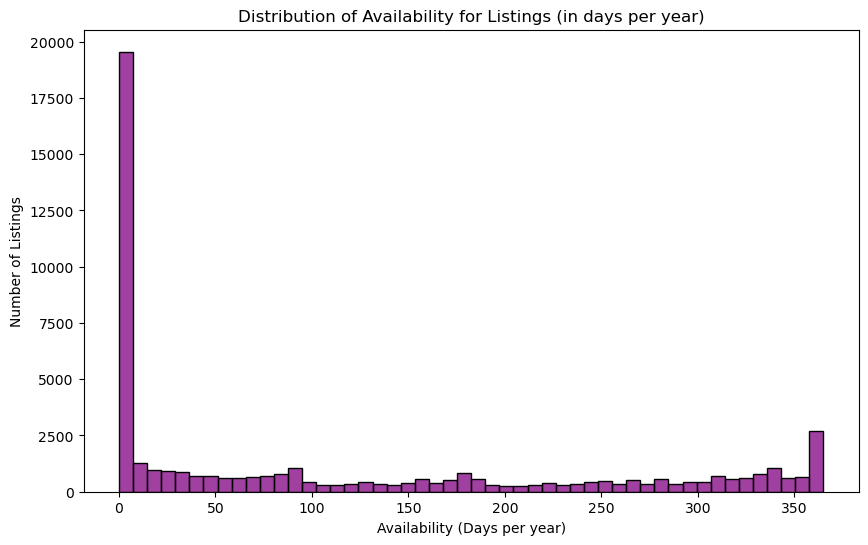

In [9]:
# Availability distribution
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['availability_365'], bins=50, kde=False, color='purple')
plt.title('Distribution of Availability for Listings (in days per year)')
plt.xlabel('Availability (Days per year)')
plt.ylabel('Number of Listings')
plt.show()



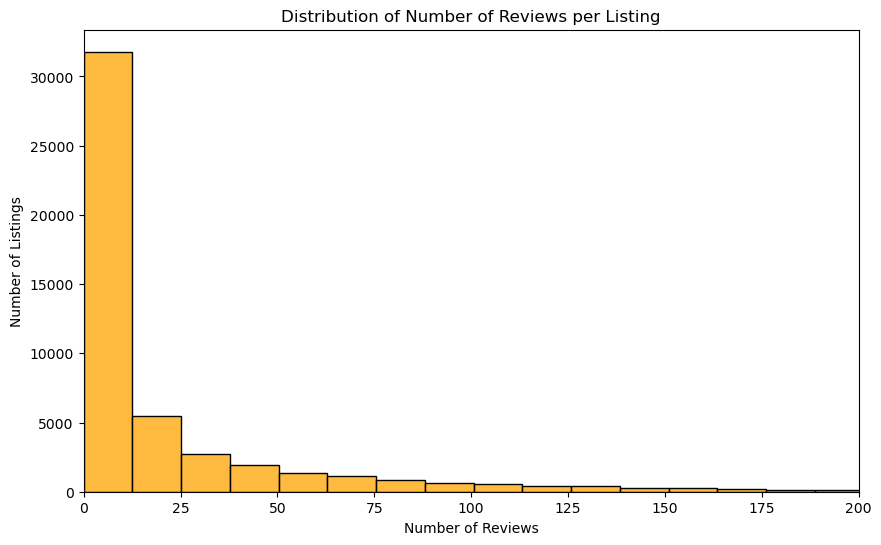

In [10]:
# Reviews distribution
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['number_of_reviews'], bins=50, kde=False, color='orange')
plt.xlim(0, 200)
plt.title('Distribution of Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()


<br/>
<br/>
<hr/>

#### <u>Key Insights</u>

1. Price Trends:
    - Manhattan properties are generally more expensive, especially entire homes or apartments.
    - Private rooms offer a more affordable alternative in popular areas like Brooklyn and Queens.

2. Room Type Preferences:
    - Entire homes/apartments attract higher-paying guests but may have fewer bookings compared to private rooms.

3. Neighbourhood Trends:
    - Hosts in Queens and Bronx could capitalize on the lower saturation by offering more competitive pricing.

4. Minimum Nights:
    - Listings with low minimum night requirements are more likely to attract short-term visitors, while longer stays (10+ nights) are rarer.

5. Availability:
    - Properties that are available for more than 200 days a year tend to have more competitive pricing strategies and potentially higher yearly earnings.

<br/>
<br/>

#### <u>Recommendations</u>

Based on the insights, the following recommendations can help Airbnb hosts optimize their listings:

1. Competitive Pricing:
    - For new or low-traffic listings, offering lower prices for private rooms in popular neighborhoods like Brooklyn can attract budget-conscious guests.

2. Optimize Minimum Nights:
    - Hosts should consider lowering the minimum night stay to 1-2 nights to attract short-term visitors, especially in high-demand areas like Manhattan.

3. Increase Reviews:
    - Encouraging guests to leave reviews can help increase booking rates, as properties with more reviews tend to build trust faster.

4. Seasonal Pricing:
    - Adjust pricing based on seasonality to ensure higher occupancy during off-peak periods. Offering discounts for stays during low-demand periods can help maintain a steady stream of bookings.

5. Target Underserved Areas:
    - Investors and new hosts could explore less saturated areas like Queens or Bronx, which are gaining popularity as more affordable alternatives to Manhattan and Brooklyn.

<hr/>
<br/>
<br/>

#### Seasonality Analysis

In [11]:
# Convert 'last_review' column to datetime format
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'], errors='coerce')

# Extract year and month from the 'last_review' date
df_cleaned['review_year'] = df_cleaned['last_review'].dt.year
df_cleaned['review_month'] = df_cleaned['last_review'].dt.month

# Drop rows where last_review is NaT (no review available)
df_cleaned = df_cleaned.dropna(subset=['last_review'])

C:\Users\USER\AppData\Local\Temp\ipykernel_11560\632889533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_month', y='num_reviews', data=monthly_reviews, palette='coolwarm')


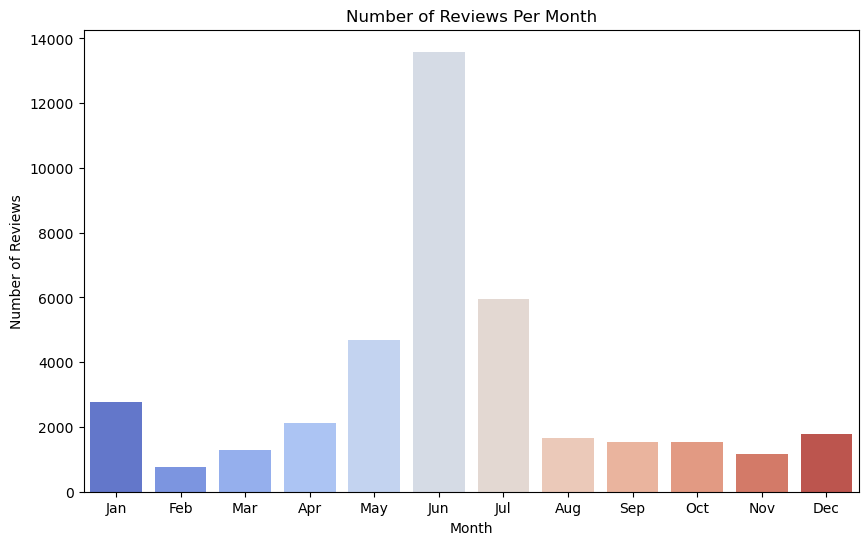

In [12]:
# Group by month to get the total number of reviews per month
monthly_reviews = df_cleaned.groupby('review_month').size().reset_index(name='num_reviews')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='review_month', y='num_reviews', data=monthly_reviews, palette='coolwarm')
plt.title('Number of Reviews Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

- Peak Seasons: Months with a higher number of reviews indicate peak periods when more guests are staying at Airbnbs.
- Off-Peak Seasons: Conversely, months with fewer reviews suggest off-peak periods when demand is lower.

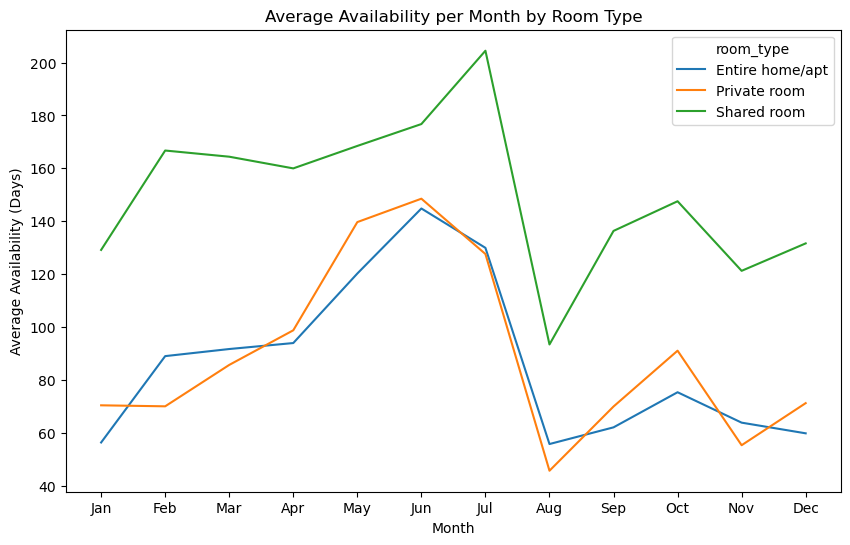

In [13]:
# Group by neighbourhood group and room type to observe availability patterns
availability_by_month = df_cleaned.groupby(['review_month', 'room_type']).agg({
    'availability_365': 'mean'
}).reset_index()

# Plot availability trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_month', y='availability_365', hue='room_type', data=availability_by_month)
plt.title('Average Availability per Month by Room Type')
plt.xlabel('Month')
plt.ylabel('Average Availability (Days)')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

- Higher availability in certain months may suggest a drop in demand, as hosts might be struggling to fill their calendars.
- Lower availability could indicate peak booking periods, where properties are more likely to be occupied.

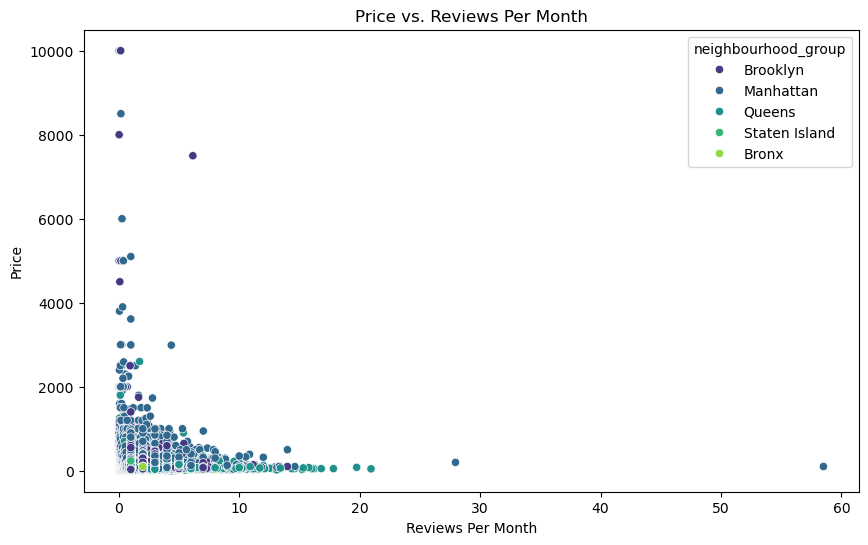

In [14]:
# Correlation between price and reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=df_cleaned, hue='neighbourhood_group', palette='viridis')
plt.title('Price vs. Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Price')
plt.show()

- Higher reviews per month could correlate with more competitively priced properties, indicating that properties with more reviews might lower prices to attract more guests.
- Lower reviews for expensive properties could indicate that luxury stays tend to get fewer but more high-value bookings.

<br/>
<hr/>
<br/>

#### <u>Key Insights from Seasonality Analysis</u>

1. Peak Booking Periods:
    - Summer months (June, July, August) tend to have higher review counts, suggesting they are peak booking periods.
    - Hosts may want to raise prices during these months to maximize revenue.

2. Off-Peak Periods:
    - January and February seem to have lower review counts, indicating off-peak periods. During these months, hosts may consider offering discounts or promotions to attract more bookings.

3. Room Type Differences:
    - Entire homes/apartments have higher availability during the off-peak months, while private rooms may have more consistent occupancy rates throughout the year.
    - For entire homes, a dynamic pricing strategy (increasing prices during peak months, lowering during off-peak months) could be beneficial.

4. Reviews and Pricing Strategy:
    - Listings with higher reviews per month tend to have more competitive pricing. This suggests that more budget-friendly listings get frequent bookings, leading to more reviews.

<br/>

#### <u>Recommendations Based on Seasonality Insights</u>

1. Dynamic Pricing Strategy:
    - Hosts should adjust prices based on seasonality, raising prices during peak periods (summer) and offering discounts or incentives during off-peak months to maintain occupancy.

2. Promotional Offers During Off-Peak Periods:
    - Offering special deals (e.g., weekly discounts, free cleaning services) during low-demand months like January and February could help increase bookings.

3. Optimize Availability for High-Demand Months:
    - Hosts should ensure their properties are listed as available during peak demand months (June - August) to capture a larger share of the market.

4. Leverage Reviews for Trust Building:
    - Properties with more reviews are likely to attract more bookings. Hosts should encourage guests to leave reviews, especially during peak seasons, to build a trustworthy reputation.

<br/>
<br/>
<hr/>

## <center><u> __Author__ </u></center>

<br/>

__GODSWILL SOTONYE JUMBO__
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Data Scientist* __|__ *Analyst*
</br>

godswill.j@outlook.com </br>
[LinkedIn Profile](https://www.linkedin.com/in/godswilljumbo) | [Github Profile](https://www.github.com/godswilljumbo) | [Portfolio](https://godswilljumbo.github.io)

*<center> 2024 &copy; Godswill Jumbo. All rights reserved. </center>*
<hr/>